<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.26

Reconsider the weather problem of Example 6.6.

Relembrando exemplo 6.6
> **Exemplo 6.6** Consider a layer of air that is heated from the bottom. In certain situations the warmer air rising up interacts with the colder air sinking down to form turbulent convection rolls. The complete derivation of the dynamics of motion involves a system of partial differential equations, which can be solved by the method of Fourier transforms; see Lorentz (1963). A simplified representation involves three state variables. The variable $x_1$ represents the rate at which the convection rolls rotate, $x_2$ represents the temperature difference between the ascending and descending air currents, and $x_3$ represents the deviation from linearity of the vertical temperature profile, a positive value indicating that the temperature varies faster near the boundary. The equations of motion for this system are
\begin{aligned}
x_1' &= f_1(x_1, x_2, x_3) = - \sigma x_1 + \sigma x_2 \\
x_2' &= f_2(x_1, x_2, x_3) = - x_2 + rx_1 - x_1 x_3 \\
x_3' &= f_3(x_1, x_2, x_3) = - b x_3 + x_1 x_2
\end{aligned}
and we will consider the realistic case where $\sigma=10$ and $b=8/3$. The remaining parameter $r$ represents the temperature difference between the top and bottom of the air layer. Increasing $r$ pumps more energy into the system, creating more vigorous dynamics. The dynamical system of Eq. (6.19) is called the Lorentz equations, after the meteorologist E. Lorentz who analyzed them;


### a) Use a computer implementation of the Euler method to reproduce the results of Figure 6.33 in the text. Assume $\sigma=10$, $b=8/3$, $r=8$, and use the initial condition $(x_1, x_2, x_3) = (1, 1, 1)$.

Temos as seguintes equações diferenciais:

In [ ]:
def equacoes(x1, x2, x3, sigma=10, b=8/3, r=8):
    return (
        - sigma * x1 + sigma * x2,
        - x2 + r*x1 - x1*x3,
        -b*x3 + x1*x2
    )
 
x1, x2, x3 = var('x1 x2 x3', real=True)
 
dFdx1, dFdx2, dFdx3 = equacoes(x1, x2, x3)
 
Math(f"""
\\begin{{aligned}}
x_1' &= {latex(dFdx1)} \\\\
x_2' &= {latex(dFdx2)} \\\\
x_3' &= {latex(dFdx3)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

A seguir, o método de Euler para 3 variáveis:

In [ ]:
def MetodoEuler(funcoes, variaveis, valores_iniciais, N=100, t_0=0, T=400):
    retorno = np.zeros((4, N))
    f1 = lambdify(variaveis, funcoes[0], 'numpy')
    f2 = lambdify(variaveis, funcoes[1], 'numpy')
    f3 = lambdify(variaveis, funcoes[2], 'numpy')
    
    x1_0, x2_0, x3_0 = valores_iniciais
 
    x1_n = x1_0
    x2_n = x2_0
    x3_n = x3_0
    t_n = t_0
 
    retorno[:, 0] = [t_n, x1_n, x2_n, x3_n]
 
    h = (T-t_0)/N
    for n in range(N-1):
        x1_n = x1_n + h*f1(x1_n, x2_n, x3_n)
        x2_n = x2_n + h*f2(x1_n, x2_n, x3_n)
        x3_n = x3_n + h*f3(x1_n, x2_n, x3_n)
        t_n = t_n+h
 
        retorno[:, n+1] = [t_n, x1_n, x2_n, x3_n]
    
    resultado = pd.DataFrame(retorno.T, columns=['t', 'x1', 'x2', 'x3'])
    resultado.index = resultado.t
    del resultado['t']
    return resultado

A simulação e o gráfico solicitado:

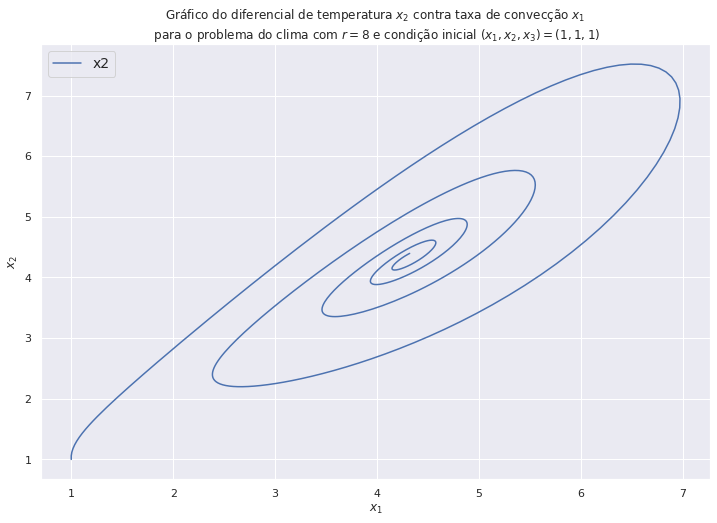

In [ ]:
valores_iniciais_a = (1, 1, 1)

simulacao_a = MetodoEuler(
    funcoes=(dFdx1, dFdx2, dFdx3),
    variaveis=(x1, x2, x3),
    valores_iniciais=valores_iniciais_a,
    N=500,
    T=5
)

simulacao_a[['x1', 'x2']].plot.line(
    x='x1',
    y='x2',
    title="Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=8$ e condição inicial $(x_1, x_2, x_3)=(1, 1, 1)$",
    figsize=(12, 8),
    xlabel='$x_1$',
    ylabel='$x_2$'
)

### b) Use the results of part (a) to plot the deviation $x_3$ from linearity of the temperature profile versus the rate $x_1$ at which the convection rolls rotate. Perform a sensitivity analysis on the step size $h$ to ensure that your plot represents the true behavior of the continuous time dynamical system.

Testaremos os seguintes valores para N:

In [ ]:
Ns = [
    5, 10, 20,
    25, 30, 35,
    40, 500, 800
]

Primeiramente, geremos o gráfico correspondente a Figura 6.33 para verificar se o comportamento é parecido. Isto é, geremos diversos gráficos do diferencial de temperatura $x_2$ contra a taxa de convecção $x_1$ para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)=(1, 1, 1)$ e $h=\frac{T}{N}$, com $T=5$.

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


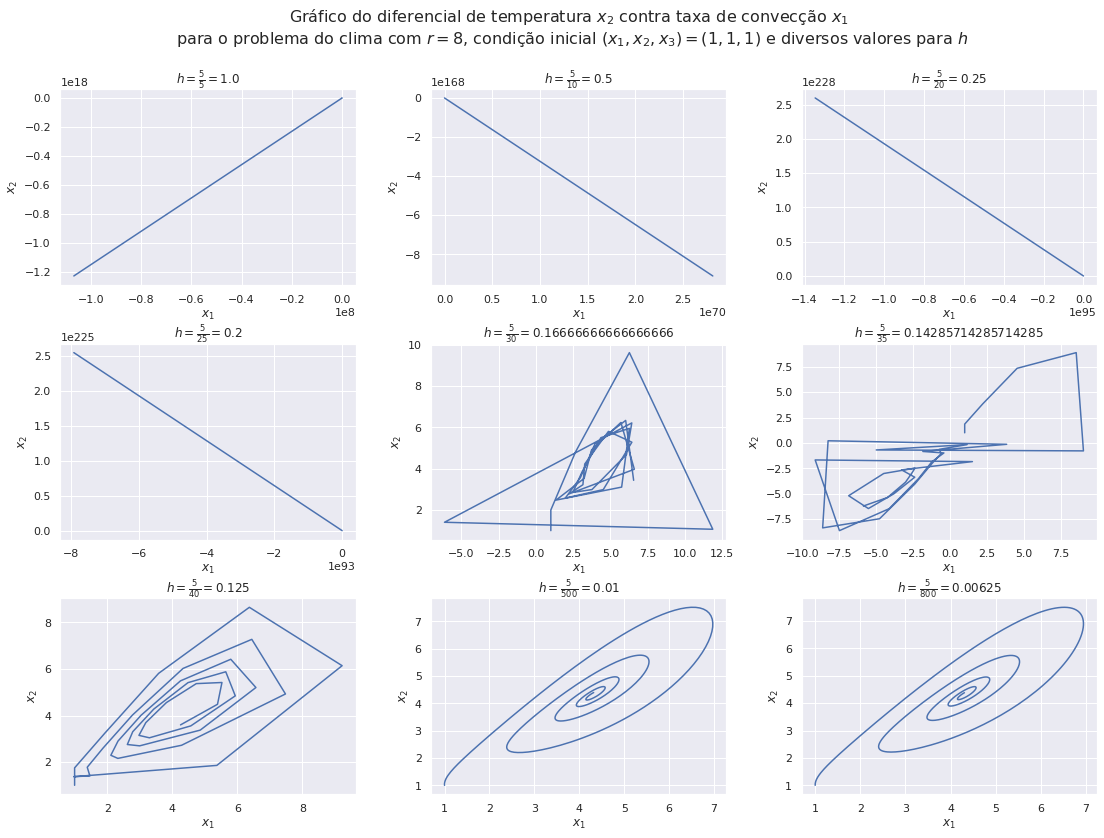

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_a}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)

for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_a,
        N=N,
        T=T
    )[['x1', 'x2']].plot.line(
        x='x1',
        y='x2',
        xlabel='$x_1$',
        ylabel='$x_2$',
        title=f"$h=\\frac{{{T}}}{{{N}}} = {T/N}$",
        ax=ax
    )
    ax.get_legend().remove()

Agora, serão gerados os gráficos solicitados pelo enunciado.
Isto é, serão gerados diversos gráficos do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)=(1, 1, 1)$ e $h=\frac{T}{N}$, com $T=5$

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


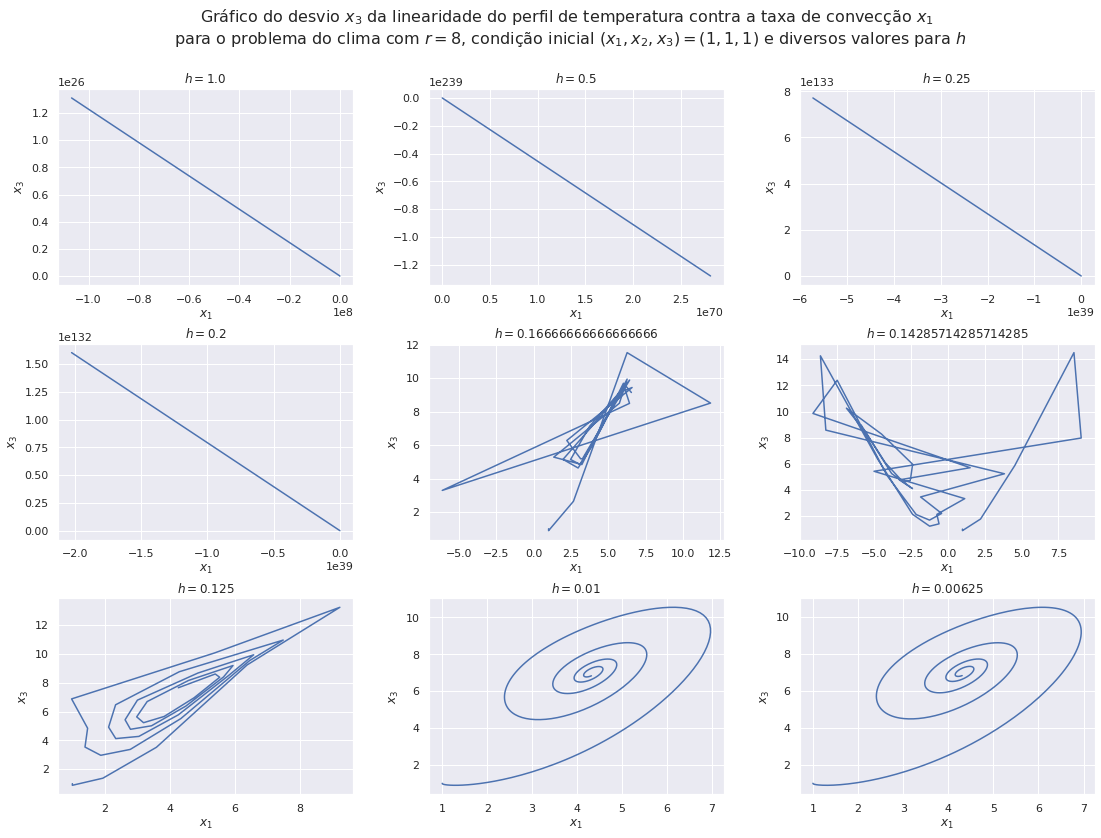

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ \n para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_a}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)


for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_a,
        N=N,
        T=T
    )[['x1', 'x3']].plot.line(
        x='x1',
        y='x3',
        xlabel='$x_1$',
        ylabel='$x_3$',
        title=f"$h={T/N}$",
        ax=ax,
    )
    ax.get_legend().remove()

Pelos gráficos com passos $h = \frac{5}{5}, \frac{5}{10}, \frac{5}{20},\frac{5}{25}, \frac{5}{30}, \frac{5}{35}, \frac{5}{40}$
acima, podemos observar que o método de Euler não converge para o ponto de equilíbrio $ E^{+} =  (\sqrt(b\cdot(r-1)), \sqrt(b\cdot(r-1)), r-1)$. Como $b = \frac{8}{3}$ e $r = 8$, $ E^{+}= (\sqrt\frac{8\cdot7}{3}, \sqrt\frac{8\cdot7}{3}, 7) \approx (4.32, 4.32, 7)$.

Já os gráficos com passos $h = \frac{5}{500}, \frac{5}{800}$ acima, podemos observar que a solução aproximada tende para o ponto de equilíbrio $E^{+}$. 

Assim, o método de Euler nem sempre convergirá para o ponto de equilíbrio $E^{+}$, pois dependerá do passo $h$ utilizado.

### c) Repeat part (b) for the initial condition $(x_1, x_2, x_3)$ $=$ $(7, 1, 2)$. Does the solution curve approach the equilibrium found in the text?

Testaremos os mesmos valores de N do item b), e com o seguinte ponto inicial:

In [ ]:
valores_iniciais_c = (7, 1, 2)

Primeiramente, geremos o gráfico correspondente a Figura 6.34 para verificar se o comportamento é parecido. Isto é, geremos diversos gráficos do diferencial de temperatura $x_2$ contra a taxa de convecção $x_1$ para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)=(7, 1, 2)$ e $h=\frac{T}{N}$, com $T=5$

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


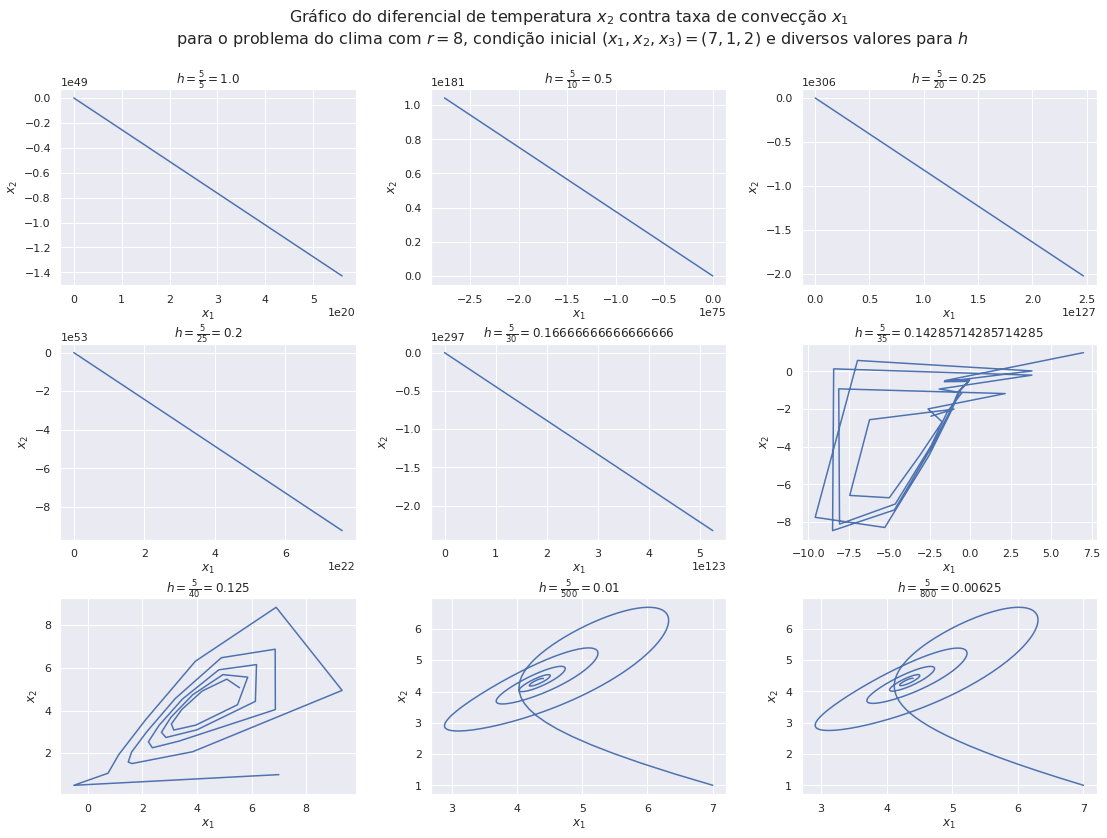

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_c}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)

for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_c,
        N=N,
        T=T
    )[['x1', 'x2']].plot.line(
        x='x1',
        y='x2',
        xlabel='$x_1$',
        ylabel='$x_2$',
        title=f"$h=\\frac{{{T}}}{{{N}}} = {T/N}$",
        ax=ax
    )
    ax.get_legend().remove()

Agora, serão gerados os gráficos solicitados pelo enunciado.
Isto é, serão gerados diversos gráficos do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)=(7, 1, 2)$ e $h=\frac{T}{N}$, com $T=5$

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


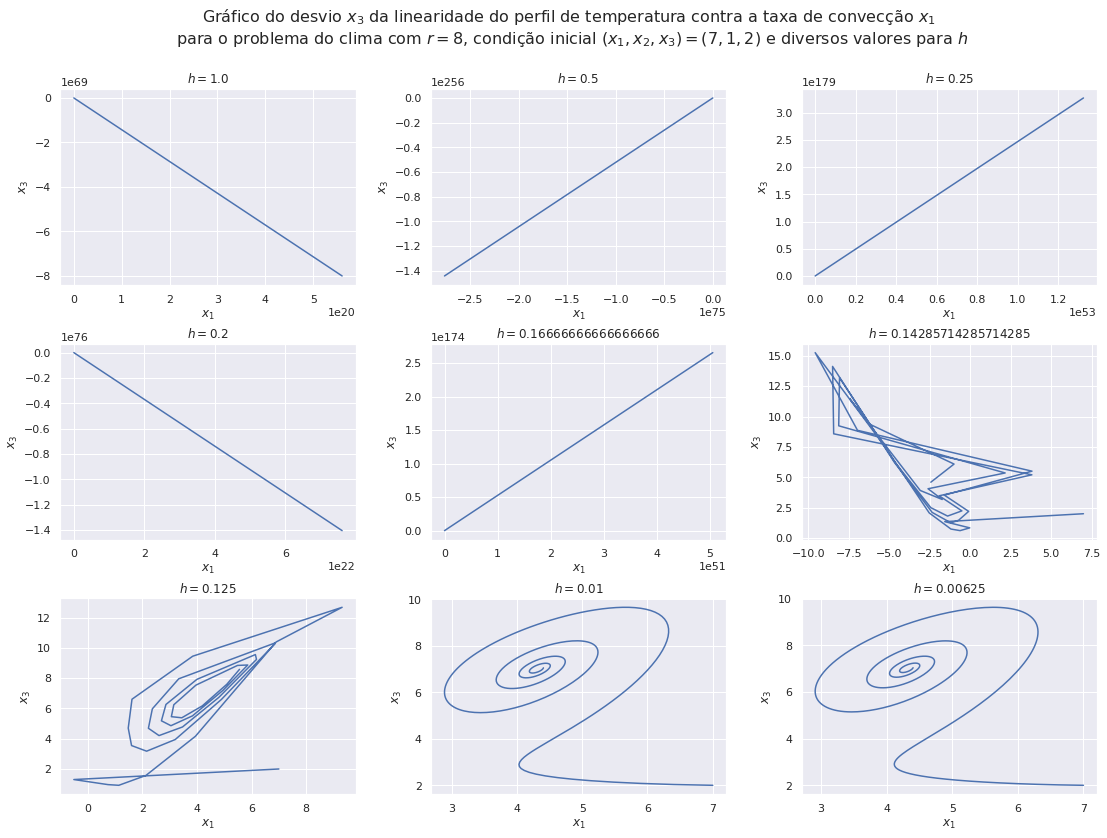

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ \n para o problema do clima com $r=8$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_c}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)


for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_c,
        N=N,
        T=T
    )[['x1', 'x3']].plot.line(
        x='x1',
        y='x3',
        xlabel='$x_1$',
        ylabel='$x_3$',
        title=f"$h={T/N}$",
        ax=ax,
    )
    ax.get_legend().remove()

Pelos gráficos com passos $h = \frac{5}{5}, \frac{5}{10}, \frac{5}{20},\frac{5}{25}, \frac{5}{30}, \frac{5}{35}, \frac{5}{40}$
acima, podemos observar que o método de Euler não converge para o ponto de equilíbrio $ E^{+} =  (\sqrt(b*(r-1)), \sqrt(b*(r-1)), r-1)$. Como $b = \frac{8}{3}$ e $r = 8$, $ E^{+}= (\sqrt\frac{8*7}{3}, \sqrt\frac{8*7}{3}, 7) \approx (4.32, 4.32, 7)$.

Já os gráficos com passos $h = \frac{5}{500}, \frac{5}{800}$ acima, podemos observar que a solução aproximada tende para o ponto de equilíbrio $E^{+}$. 

Assim, o método de Euler nem sempre convergirá para o ponto de equilíbrio $E^{+}$, pois dependerá do passo $h$ utilizado.

Fazendo uma comparação com a resolução do item $b)$, podemos observar que as mesmas observações feitas para o item $b)$ foram feitas para este item mesmo a condição inicial sendo diferente do item anterior.

### d) Repeat part (b) for $r=18$ and $r=28$. How does the solution behavior change as $r$ increases?

#### $r=18$

Teremos agora as seguintes equações:

In [ ]:
dFdx1, dFdx2, dFdx3 = equacoes(x1, x2, x3, r=18)

Math(f"""
\\begin{{aligned}}
x_1' &= {latex(dFdx1)} \\\\
x_2' &= {latex(dFdx2)} \\\\
x_3' &= {latex(dFdx3)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Primeiramente, geremos o gráfico correspondente a Figura 6.33 para verificar se o comportamento é parecido. Isto é, geremos diversos gráficos do diferencial de temperatura $x_2$ contra a taxa de convecção $x_1$ para o problema do clima com $r=18$, condição inicial $(x_1, x_2, x_3)=(1, 1, 1)$ e $h=\frac{T}{N}$, com $T=5 \cdot 15$.

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/di

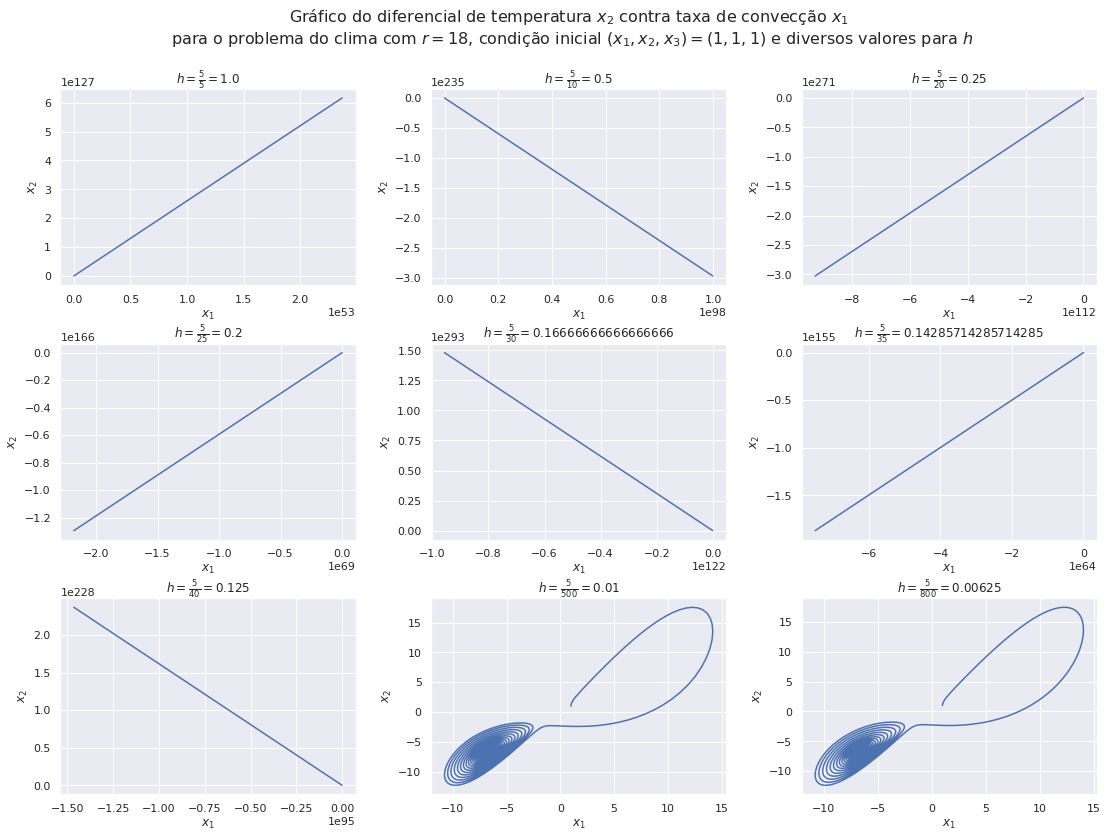

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=18$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_a}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)

for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_a,
        N=N*15,
        T=T*15
    )[['x1', 'x2']].plot.line(
        x='x1',
        y='x2',
        xlabel='$x_1$',
        ylabel='$x_2$',
        title=f"$h=\\frac{{{T}}}{{{N}}} = {T/N}$",
        ax=ax
    )
    ax.get_legend().remove()

Agora, serão gerados os gráficos solicitados pelo enunciado.
Isto é, serão gerados diversos gráficos do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ para o problema do clima com $r=18$, condição inicial $(x_1, x_2, x_3)=(1, 1, 1)$ e $h=\frac{T}{N}$, com $T=5 \cdot 15$.

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/di

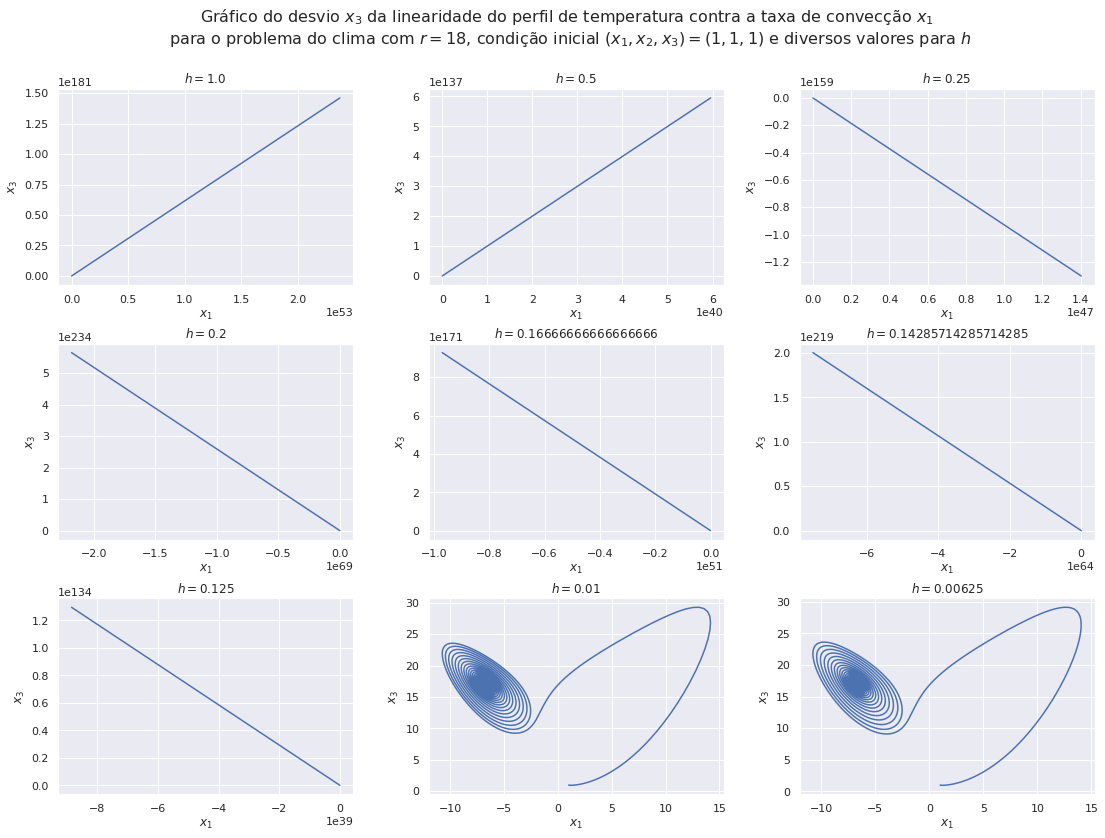

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ \n para o problema do clima com $r=18$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_a}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)


for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_a,
        N=N*15,
        T=T*15
    )[['x1', 'x3']].plot.line(
        x='x1',
        y='x3',
        xlabel='$x_1$',
        ylabel='$x_3$',
        title=f"$h={T/N}$",
        ax=ax,
    )
    ax.get_legend().remove()

Pelos gráficos com passos $h = \frac{5}{5}, \frac{5}{10}, \frac{5}{20},\frac{5}{25}, \frac{5}{30}, \frac{5}{35}, \frac{5}{40}$
acima, podemos observar que o método de Euler não converge para o ponto de equilíbrio $ E^{-} =  (-\sqrt(b\cdot(r-1)), -\sqrt(b\cdot(r-1)), r-1)$. Como $b = \frac{8}{3}$ e $r = 18$, $ E^{-}= (-\sqrt\frac{8\cdot17}{3}, -\sqrt\frac{8\cdot17}{3}, 17) \approx (-6.73, -6.73, 17)$.

Já os gráficos com passos $h = \frac{5}{500}, \frac{5}{800}$ acima, podemos observar que a solução aproximada tende para o ponto de equilíbrio $E^{-}$.

Assim, o método de Euler nem sempre convergirá para o ponto de equilíbrio $E^{-}$, pois dependerá do passo $h$ utilizado.



#### $r=28$

Teremos agora as seguintes equações:

In [ ]:
dFdx1, dFdx2, dFdx3 = equacoes(x1, x2, x3, r=28)
 
Math(f"""
\\begin{{aligned}}
x_1' &= {latex(dFdx1)} \\\\
x_2' &= {latex(dFdx2)} \\\\
x_3' &= {latex(dFdx3)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Primeiramente, geremos o gráfico correspondente a Figura 6.33 para verificar se o comportamento é parecido. Isto é, geremos diversos gráficos do diferencial de temperatura $x_2$ contra a taxa de convecção $x_1$ para o problema do clima com $r=28$, condição inicial $(x_1, x_2, x_3)=(1, 1, 1)$ e $h=\frac{T}{N}$, com $T=5 \cdot 15$.

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-package

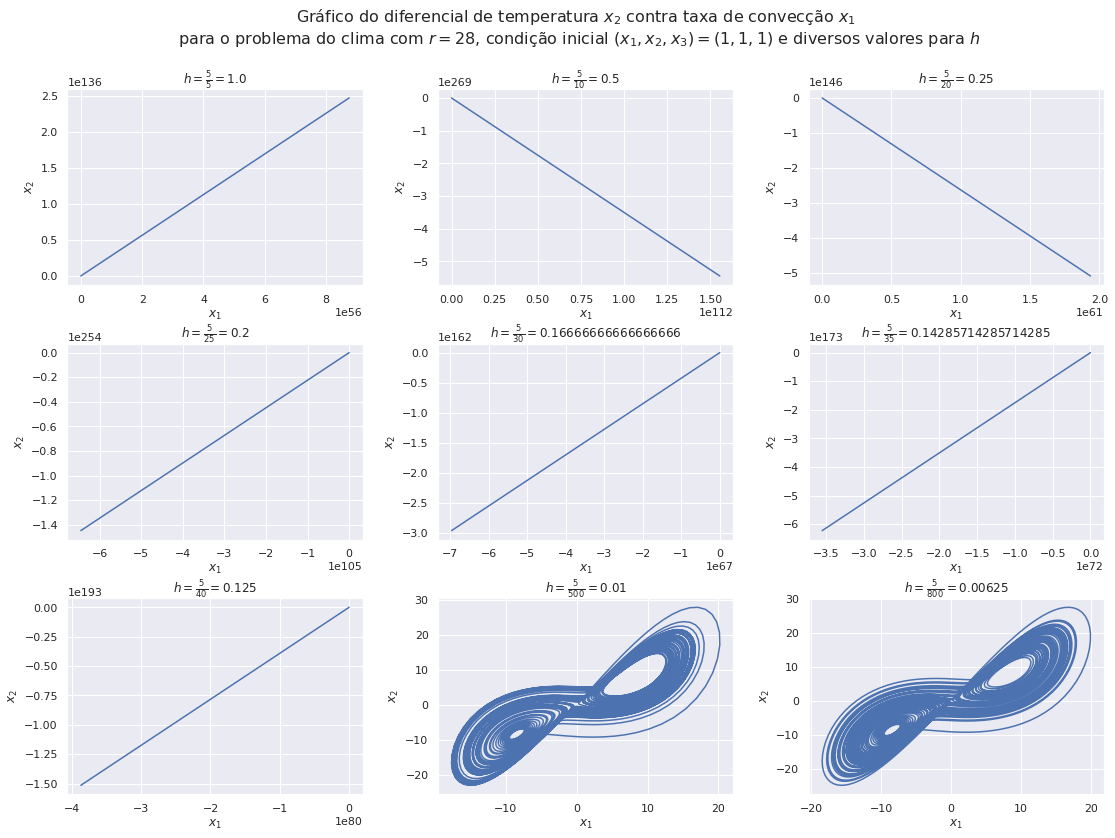

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=28$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_a}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)

for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_a,
        N=N*15,
        T=T*15
    )[['x1', 'x2']].plot.line(
        x='x1',
        y='x2',
        xlabel='$x_1$',
        ylabel='$x_2$',
        title=f"$h=\\frac{{{T}}}{{{N}}} = {T/N}$",
        ax=ax
    )
    ax.get_legend().remove()

Agora, serão gerados os gráficos solicitados pelo enunciado.
Isto é, serão gerados diversos gráficos do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ para o problema do clima com $r=28$, condição inicial $(x_1, x_2, x_3)=(1, 1, 1)$ e $h=\frac{T}{N}$, com $T=5 \cdot 15$.


/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-package

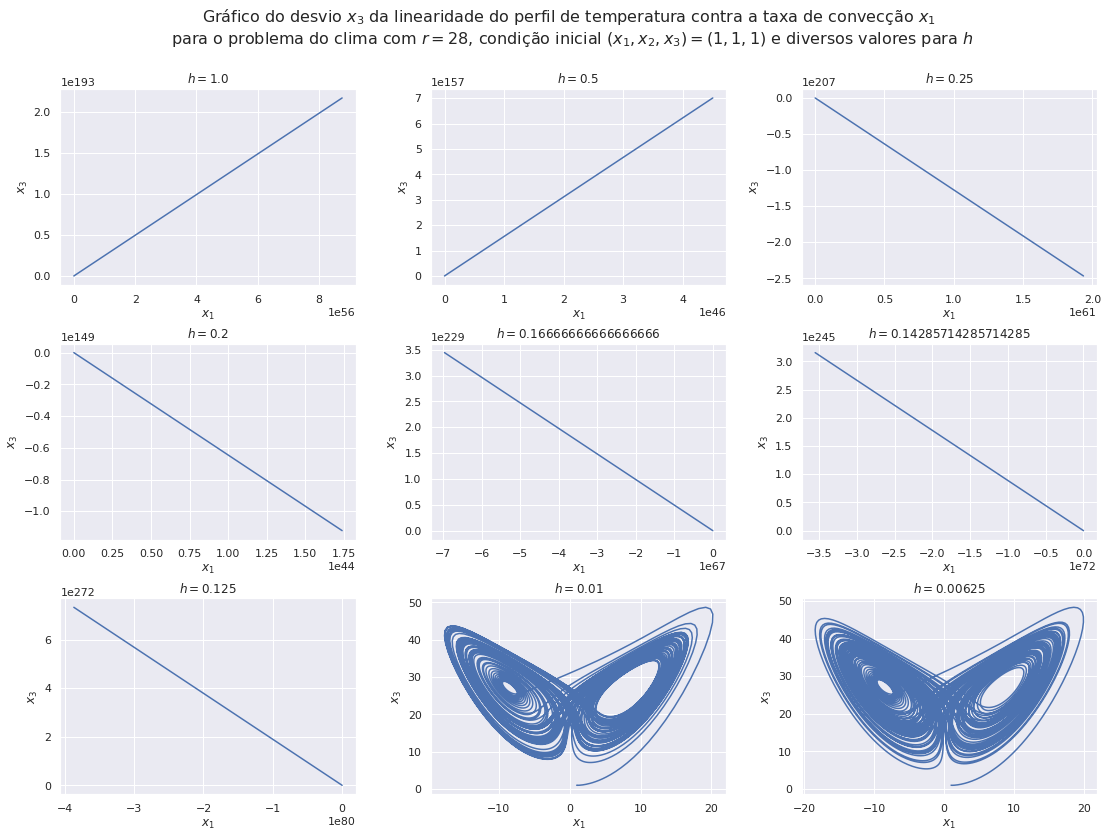

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do desvio $x_3$ da linearidade do perfil de temperatura contra a taxa de convecção $x_1$ \n para o problema do clima com $r=28$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_a}$ e diversos valores para $h$', fontsize=16)
plt.subplots_adjust(top=0.885)


for i, (N, ax) in enumerate(zip(Ns, axes.flatten())):
    T = 5
 
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_a,
        N=N*15,
        T=T*15
    )[['x1', 'x3']].plot.line(
        x='x1',
        y='x3',
        xlabel='$x_1$',
        ylabel='$x_3$',
        title=f"$h={T/N}$",
        ax=ax,
    )
    ax.get_legend().remove()

Pelos gráficos com passos $h = \frac{5}{5}, \frac{5}{10}, \frac{5}{20},\frac{5}{25}, \frac{5}{30}, \frac{5}{35}, \frac{5}{40}, \frac{5}{500}, \frac{5}{800} $
acima, podemos observar que o método de Euler não converge para o ponto de equilíbrio $ E^{-} =  (-\sqrt(b\cdot(r-1)), -\sqrt(b\cdot(r-1)), r-1)$ e nem $ E^{+} =  (\sqrt(b\cdot(r-1)), \sqrt(b\cdot(r-1)), r-1)$. Como $b = \frac{8}{3}$ e $r = 28$, $ E^{-}= (-\sqrt\frac{8*17}{3}, -\sqrt\frac{8*17}{3}, 27) \approx (-6.73, -6.73, 27)$ e $ E^{+}= (\sqrt\frac{8*17}{3}, \sqrt\frac{8*17}{3}, 27) \approx (6.73, 6.73, 27)$ .

Assim, o método de Euler não convergirá para o ponto de equilíbrio $E^{-}$ e nem para o ponto de equilíbrio $E^{+}$.



#### Comparação de $r=18$ e $r=28$

Podemos observar que quando $r=18$, o método de Euler convergirá para o ponto de equilíbrio $E^{-}$. Já quando $r = 28$, o método de Euler não convergirá para nenhum ponto de equilíbrio.